In [1]:
from IPython.display import display, Markdown
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

from script.helpers import get_data, report_cm

In [2]:
X, holds, names = get_data()

In [3]:
def rforest_fit_transform(omitting_name):
    y = holds.fillna('idle')
    c = (names == omitting_name)
    
    X_train, X_test, y_train, y_test = (X[~c], X[c], y[~c], y[c])
    classifier = RandomForestClassifier()
    classifier.fit(X_train, y_train)
    
    y_pred = pd.Series(classifier.predict(X_test))
    y_pred.index = y_test.index
    return y_test, y_pred, classifier

# gregor

accuracy: 0.6188803966122702


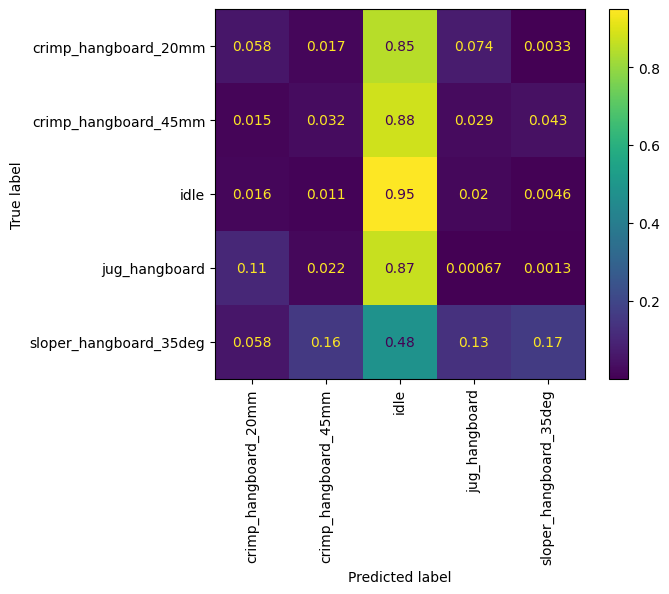

# jannis

accuracy: 0.6969408277760135


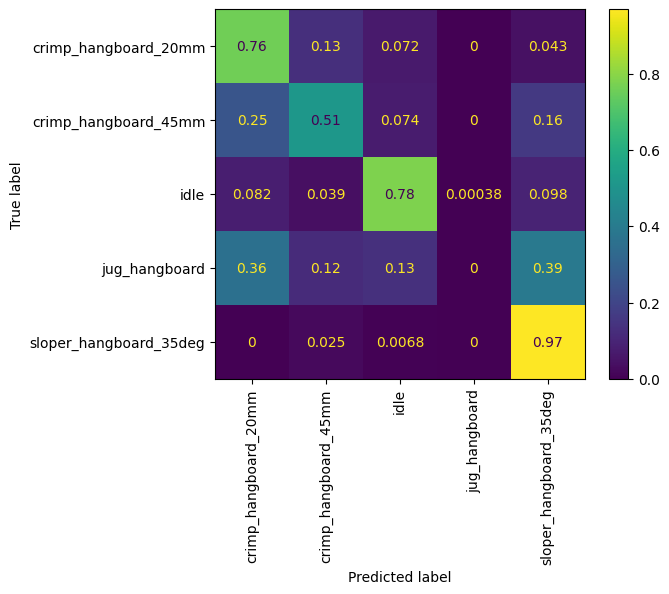

# jonas

accuracy: 0.6548559775681876


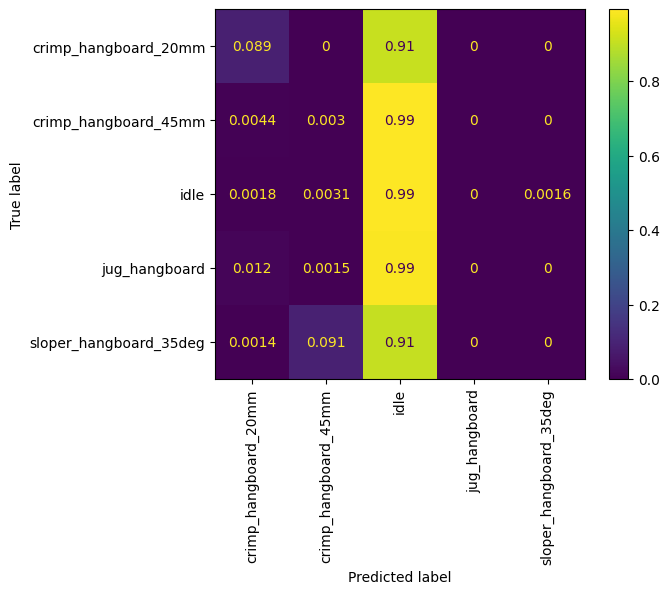

# nikolai

accuracy: 0.5836661504605102


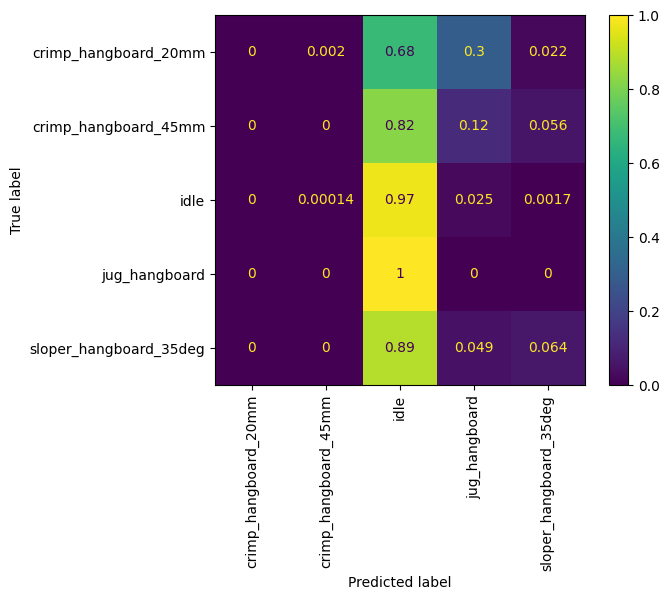

In [4]:
for name in pd.Categorical(names).categories:
    t, p, classifier = rforest_fit_transform(name)
    report_cm(name, t, p, classifier)